# **Модуль threading**

### **Краткая информация**
Модуль **threading** значительно упрощает работу с потоками и позволяет программировать запуск нескольких операций одновременно.


### **Итак, перейдем к теории по модулю и примерам:**

Первый пример - демонстрация работы модуля. Обратите внимание на закомментированную строчку **x.join()**. 

In [24]:
import logging
import threading
import time


def thread_function(name):
    logging.info("Поток %s: запуск", name)
    time.sleep(2)
    logging.info("Поток %s: завершение", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    logging.info("Main    : Перед созданием потока")

    x = threading.Thread(target=thread_function, args=(1,), daemon = True)

    logging.info("Main    : Перед запуском потока")
    x.start()
    logging.info("Main    : Ожидание завершения работы функции")
    # x.join()
    
    logging.info("Main    : Завершение работы")

09:51:49: Main    : Перед созданием потока
09:51:49: Main    : Перед запуском потока
09:51:49: Поток 1: запуск
09:51:49: Main    : Ожидание завершения работы функции
09:51:49: Main    : Завершение работы


Вы могли заметить, что сообщения **Поток 1: запуск** не последовало. Давайте разберемся, почему.

## **Демоны потоков**

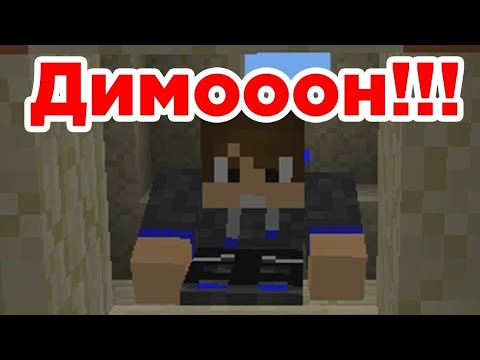

В информатике **daemon** (демон) — это процесс, который работает в фоновом режиме.

Демон потока (или как еще его можно назвать демонический поток) будет остановлен сразу после выхода из программы.

Если в программе запущены потоки, которые не являются демонами, то программа будет ожидать завершения этих потоков, прежде чем сможет завершится. Тем не менее, потоки, которые являются демонами, при закрытие программы просто убиваются, в каком бы они состояние ни находились.

Давайте запустим этот пример уже с аргументом `daemon = False`:
`x = threading.Thread(target=thread_function, args=(1,), daemon=True)`

**Пример не работает в колабе. На занятии я показал его отдельно.**

In [3]:
import logging
import threading
import time


def thread_function(name):
    logging.info("Поток %s: запуск", name)
    time.sleep(2)
    logging.info("Поток %s: завершение", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    logging.info("Main    : Перед созданием потока")

    x = threading.Thread(target=thread_function, args=(1,), daemon = True) #Изменненная строчка

    logging.info("Main    : Перед запуском потока")
    x.start()
    logging.info("Main    : Ожидание завершения работы функции")
    # x.join()
    logging.info("Main    : Завершение работы")

08:52:12: Main    : Перед созданием потока
08:52:12: Main    : Перед запуском потока
08:52:12: Поток 1: запуск
08:52:12: Main    : Ожидание завершения работы функции
08:52:12: Main    : Завершение работы


## **join()**
Демонические потоки удобны, но что делать, если вы хотите дождаться остановки потока перед выполнением другого? В первом примере была закомментированная строчка:

`# x.join()`

Чтобы указать одному потоку **дождаться завершения другого потока**, вам нужно вызывать .join().

## **Работа с несколькими потоками**

До этого мы рассматривали примеры только с двумя потоками: основным и тем, который мы создаем с помощью объекта threading.Thread. 

Но зачастую необходимо запускать больше потоков. Для этого есть несколько способов, для наглядности мы начнем с более неудобного.

**Не актуально для колаба. Я показал это отдельно:**
Обратите внимание, что наши потоки запускаются в том порядке, в котором они написаны в коде, но заканчиваются в случайном порядке.

Порядок выполнения потоков определяется операционной системой и его может быть довольно сложно предсказать. Он может (и, вероятно, будет) изменяться от запуска к запуску, поэтому следует помнить об этом при разработке алгоритмов, использующих многопоточность.

In [4]:
import logging
import threading
import time

def thread_function(name):
    logging.info("Поток %s: запуск", name)
    time.sleep(2)
    logging.info("Поток %s: завершение", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    threads = list()

    for index in range(3):
        logging.info("Main    : Создание и запуск потока %d.", index)
        x = threading.Thread(target=thread_function, args=(index,))
        threads.append(x)
        x.start()

    for index, thread in enumerate(threads):
        logging.info("Main    : Перед завершением работы потока %d.", index)
        thread.join()
        logging.info("Main    : Поток %d завершил работу", index)

08:54:39: Main    : Создание и запуск потока 0.
08:54:39: Поток 0: запуск
08:54:39: Main    : Создание и запуск потока 1.
08:54:39: Поток 1: запуск
08:54:39: Main    : Создание и запуск потока 2.
08:54:39: Поток 2: запуск
08:54:39: Main    : Перед завершением работы потока 0.
08:54:41: Поток 0: завершение
08:54:41: Main    : Поток 0 завершил работу
08:54:41: Main    : Перед завершением работы потока 1.
08:54:41: Поток 1: завершение
08:54:41: Main    : Поток 1 завершил работу
08:54:41: Main    : Перед завершением работы потока 2.
08:54:41: Поток 2: завершение
08:54:41: Main    : Поток 2 завершил работу


Есть более простой способ запустить группу потоков. Он называется **ThreadPoolExecutor** и является частью стандартной библиотеки в concurrent.futures

Самый простой способ создать его — использовать диспетчер контекста, используя оператор **with** для управления созданием и удалением пула.

Код создает **ThreadPoolExecutor** как менеджер контекста, сообщая ему, сколько рабочих потоков он хочет в пуле. Затем он использует **.map()** для пошагового прохождения итерируемой объкта, в нашем случае **range(3)**, передавая каждый поток в пул.

Конец блока **with** заставляет **ThreadPoolExecutor** выполнить **.join()** для каждого из потоков в пуле. Настоятельно рекомендуется использовать **ThreadPoolExecutor** в качестве диспетчера контекста, чтобы вы никогда не забыли про использование **.join()**.

**Примечание**. Использование **ThreadPoolExecutor** может привести к ошибкам. Например, если вы вызываете функцию, которая не принимает параметров, но передаете ей параметры в **.map()**, в этом случае поток выдаст исключение. К сожалению, **ThreadPoolExecutor** скрывает это исключение, и программа завершается без вывода. Это может запутать вас при отладке.
Перепишем последний пример:

In [25]:
import logging
import threading
import time
import concurrent.futures

def thread_function(name):
    logging.info("Поток %s: запуск", name)
    time.sleep(2)
    logging.info("Поток %s: завершение", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    with concurrent.futures.ThreadPoolExecutor(max_workers=3) as executor:
        executor.map(thread_function, range(3))

09:57:09: Поток 0: запуск
09:57:09: Поток 1: запуск
09:57:09: Поток 2: запуск
09:57:11: Поток 0: завершение
09:57:11: Поток 1: завершение
09:57:11: Поток 2: завершение


**Не актуально для колаба**

Опять же, обратите внимание, что потоки завершаются не в ожидаемом порядке. 
Планирование потоков выполняется операционной системой.

## **Race Conditions (условия гонки)**

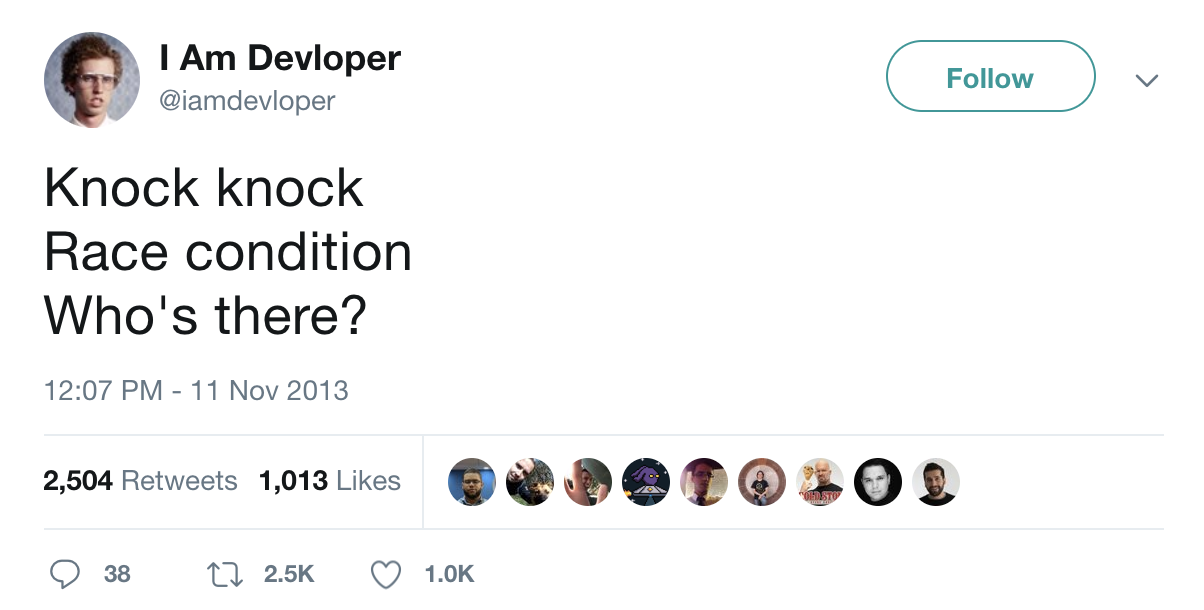

Давайте поговорим об одной из самых сложных проблем, с которой вы можете столкнуться при написании многопоточных программ: **Race Conditions**.

Условия гонки могут возникнуть, когда два или более потока обращаются к одному фрагменту данных или ресурсу.

В нашем примере мы напишем класс, который будет имитировать обновление базы данных. Наш класс  будет называться **FakeDatabase** и у него будут методы .**__init__()** и **.update()**:

```
class FakeDatabase:
    def __init__(self):
        self.value = 0

    def update(self, name):
        logging.info("Поток %s: Начало обновления", name)
        local_copy = self.value
        local_copy += 1
        time.sleep(0.1)
        self.value = local_copy
        logging.info("Поток %s: Конец обновления", name)
```



**FakeDatabase** отслеживает одно число: **value**. Это будут общие данные, на которых мы увидим проблему.

**.__init__()** просто инициализирует значение value в ноль.

**.update ()** выглядит немного странно. Этот метод имитирует чтение и запись некоторого значения в базе данных. После чтения делаются некоторые вычисления, а затем новое значение записывается в базу данных.

**Вот как мы будем использовать FakeDatabase:**

Программа создает **ThreadPoolExecutor** с двумя потоками, а затем вызывает метод **.submit()** для каждого из них, приказывая им запустить database**.update()**.

Метод **.submit()** имеет формат, который позволяет передавать как позиционные, так и именованные аргументы функции, выполняющейся в потоке:

`.submit(function, *args, **kwargs)`

In [26]:
import time
import threading

class FakeDatabase:
    def __init__(self):
        self.value = 0
 
    def update(self, name):
        logging.info("Поток %s: Начало обновления", name)
        local_copy = self.value
        local_copy += 1
        time.sleep(0.1)
        self.value = local_copy
        logging.info("Поток %s: Конец обновления", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    
    database = FakeDatabase()
    logging.info("Тестируем update(). Начальное значение: %d.", database.value)

    with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
        for index in range(2):
            executor.submit(database.update, index)
    logging.info("Тестируем update(). Конечное значение: %d.", database.value)

09:58:50: Тестируем update(). Начальное значение: 0.
09:58:50: Поток 0: Начало обновления
09:58:50: Поток 1: Начало обновления
09:58:50: Поток 0: Конец обновления
09:58:50: Поток 1: Конец обновления
09:58:50: Тестируем update(). Конечное значение: 1.


Поскольку каждый поток выполняет **.update()**, а **.update()** добавляет один к значению **value**, мы ожидаем, что в итоге **value** будет равна 2.

Давайте разберемся.

Когда запускается **Поток 0**, переменная **local_copy** действительно принимает значение **value** = 0 и прибавляет к себе единицу. Но далее она *уходит в спячку на 100 миллисекунд, не обновляя* **value**.

Сразу после этого запускается Поток 1, переменная **local_copy** которой тоже принимает значение **value**, *все еще равное 0*, и тоже прибавляя к себе единицу. Далее она уходит в спячку на 100 мс. 

В итоге эти потоки просыпаются по очереди и присваивают свою единицу переменной **value**.

## **Способы избегания Race Conditions**

Рассмотрим пару самых популярных способов:
### **Lock** (блокировка)

**Lock** — это объект, который действует как коридор в зал. Только один поток за раз может использовать **Lock**. Любой другой поток, который захочет его использовать, должен подждать, пока текущий владелец не завершит свою работу.

Основными методами **lock** являются **.acquire()** и **.release()**. Чтобы получить **lock**, потоку нужно вызвать my_lock**.acquire()**. Если блокировка уже удерживается, вызывающий поток будет ждать, пока она не будет снята. Здесь есть важный момент. Если один поток получает блокировку, но никогда не снимает ее, программа зависнет.

К счастью, в Python **Lock** может также работать как менеджер контекста, так что вы можете использовать его с **with**, тогда он будет освобожден автоматически, когда блок with завершится.

Давайте изменим класс **FakeDatabase** с использованием **Lock**:

```
class FakeDatabase:
    def __init__(self):
        self.value = 0
        self._lock = threading.Lock() #Добавлена переменная _lock

    def locked_update(self, name):
        logging.info("Поток %s: Начало обновления", name)
        logging.debug("Поток %s будет заблокирован", name)
        with self._lock:
            logging.debug("Поток %s заблокирован", name)
            local_copy = self.value
            local_copy += 1
            time.sleep(0.1)
            self.value = local_copy
            logging.debug("Поток %s будет снята блокировка", name) #Блокировка снимается оператором with

        logging.debug("Поток %s После снятия блокировки", name)
        logging.info("Поток %s: Конец обновления", name)
```



Запустим обновленный код:

In [27]:
import time
import threading
import logging
import concurrent.futures

class FakeDatabase:
    def __init__(self):
        self.value = 0
        self._lock = threading.Lock() #Добавлена переменная _lock

    def locked_update(self, name):
        logging.info("Поток %s: Начало обновления", name)
        logging.debug("Поток %s будет заблокирован", name)
        with self._lock:
            logging.debug("Поток %s заблокирован", name)
            local_copy = self.value
            local_copy += 1
            time.sleep(0.1)
            self.value = local_copy
            logging.debug("Поток %s будет снята блокировка", name) #Блокировка снимается оператором with

        logging.debug("Поток %s После снятия блокировки", name)
        logging.info("Поток %s: Конец обновления", name)

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.DEBUG,
                        datefmt="%H:%M:%S")

    database = FakeDatabase()
    logging.info("Тестируем update(). Начальное значение: %d.", database.value)
    with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
        for index in range(2):
            executor.submit(database.locked_update, index)
    logging.info("Тестируем update(). Конечное значение: %d.", database.value)

10:01:51: Тестируем update(). Начальное значение: 0.
10:01:51: Поток 0: Начало обновления
10:01:51: Поток 1: Начало обновления
10:01:51: Поток 0: Конец обновления
10:01:51: Поток 1: Конец обновления
10:01:51: Тестируем update(). Конечное значение: 2.


Прежде чем двигаться дальше, мы должны рассмотреть общую проблему при использовании Lock. Как вы видели, если блокировка уже была получена, второй вызов .acquire() будет ожидать, пока поток, удерживающий блокировку, не вызовет .release(). Таким образом, следующий код просто зациклится и не выведет то, что нам нужно.

In [30]:
import threading
l = threading.Lock()
print("before first acquire")
l.acquire()
print("before second acquire")
l.release()
l.acquire()
print("acquired lock twice")

before first acquire
before second acquire
acquired lock twice


## **RLock**

К счастью, в потоках Python есть еще один объект, называемый **RLock**, который предназначен именно для таких ситуаций. **RLock** позволяет потоку вызывать **.acquire()** несколько раз, прежде чем он вызовет **.release()**. Но при этом поток все еще должен вызывать **.release()** столько же раз, сколько вызывал .**acquire()**.

In [31]:
import threading
l = threading.RLock()
print("before first acquire")
l.acquire()
print("before second acquire")
# l.release()
l.acquire()
print("acquired lock twice")
# l.release()
l.release()
l.release()

before first acquire
before second acquire
acquired lock twice


## **Простая синхронизация потоков**

### **Объекты Event**

Это один из простейших механизмов связи между потоками: один поток сигнализирует о событии, а другие потоки ожидают его.

**Event** управляет флагом, которому можно присвоить значение true с помощью метода **set** () и сбросить значение false с помощью метода **clear** (). Метод **wait** () блокируется до тех пор, пока флаг не станет истинным. Флаг изначально ложный.

**Нормально не работает в колабе. Показал отдельно.**

**is_set()**

Возвращает состояние флага

**set()**

Присваивает флагу значение True 

**clear()**

Присваивает флагу значение False 

**wait(timeout=None)**

Ждет, пока флаг не станет True


In [32]:
import threading
import time

e1 = threading.Event()

def first_thread():
  time.sleep(5)
  print('Прошло пять секунд')
  e1.set()

def second_thread():
  e1.wait()
  print('Получил e1')
  time.sleep(1)
  print('Прошла еще одна секунда')

def third_thread():
    for i in range(7):
        time.sleep(1)
        print(f'Состояние e1: {e1.is_set()}')

t1 = threading.Thread(target=first_thread)
t2 = threading.Thread(target=second_thread)
t3 = threading.Thread(target=third_thread)

t1.start()
t2.start()
t3.start()
t1.join()
t2.join()
t3.join()


Состояние e1: False
Состояние e1: False
Состояние e1: False
Состояние e1: False
Прошло пять секунды
Получил e1
Состояние e1: True
Прошла еще одна секунда
Состояние e1: True
Состояние e1: True


### **Объекты Timer**

Этот класс представляет действие, которое следует запускать только по прошествии определенного времени - таймера. Таймер является подклассом Thread и, как таковой, также служит примером создания пользовательских потоков.

**threading.Timer(interval, function, args=None, kwargs=None)**

Таймер

**cancel()**

Остановить таймер

In [33]:
import threading

def stope():
  print('СТОПЭ')

timer1 = threading.Timer(interval=3, function=stope)
timer1.start()
timer1.join()

СТОПЭ
